<a href="https://colab.research.google.com/github/mehular0ra/Pytorch-Tutorial/blob/main/Pytorch_Linear_Classification_(Logits).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# loading in the data
from sklearn.datasets import load_breast_cancer

In [4]:
# loading the data
data = load_breast_cancer()

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33)
N, D = X_train.shape

In [70]:
# standardize the dataset according to the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [71]:
# initialize the model 
model = nn.Linear(D, 1)

In [72]:
# loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params = model.parameters())

In [73]:
print(type(X_train), type(X_test))
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
X_train shape: (381, 30)
X_test shape: (188, 30)
y_train shape: (381,)
y_test shape: (188,)


In [74]:
# convert data into float32 format
X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))

X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [75]:
n_epochs = 1000

# save the train and test losses
train_losses = []
test_losses = []
train_access = []
test_access = []

for it in range(n_epochs): 
    # zero the gradient parameters
    optimizer.zero_grad()

    # forward
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # backward and optimize
    loss.backward()
    optimizer.step()

    # get the test loss
    outputs_test = model(X_test)
    loss_test = criterion(outputs_test, y_test)

    # save train and test loss
    train_losses.append(loss.item())
    test_losses.append(loss_test.item())

    # calculate accuracy 
    with torch.no_grad():
        p_train = (outputs.numpy() > 0)
        train_acc = np.mean(y_train.numpy() == p_train)
        train_access.append(train_acc)

        p_test = (outputs_test.numpy() > 0)
        test_acc = np.mean(y_test.numpy() == p_test)
        test_access.append(test_acc)

    if (it+1) % 10 == 0: 
        print(f'Iteration: {it+1}/{n_epochs}, train accuracy: {train_acc:.4f}, test accuracy: {test_acc:.4f}')


Iteration: 10/1000, train accuracy: 0.0971, test accuracy: 0.0745
Iteration: 20/1000, train accuracy: 0.1312, test accuracy: 0.1064
Iteration: 30/1000, train accuracy: 0.1654, test accuracy: 0.1915
Iteration: 40/1000, train accuracy: 0.2730, test accuracy: 0.2766
Iteration: 50/1000, train accuracy: 0.4173, test accuracy: 0.4202
Iteration: 60/1000, train accuracy: 0.5722, test accuracy: 0.5851
Iteration: 70/1000, train accuracy: 0.6929, test accuracy: 0.7181
Iteration: 80/1000, train accuracy: 0.7769, test accuracy: 0.7660
Iteration: 90/1000, train accuracy: 0.8268, test accuracy: 0.8191
Iteration: 100/1000, train accuracy: 0.8504, test accuracy: 0.8351
Iteration: 110/1000, train accuracy: 0.8688, test accuracy: 0.8670
Iteration: 120/1000, train accuracy: 0.8871, test accuracy: 0.8830
Iteration: 130/1000, train accuracy: 0.9055, test accuracy: 0.8989
Iteration: 140/1000, train accuracy: 0.9108, test accuracy: 0.8989
Iteration: 150/1000, train accuracy: 0.9160, test accuracy: 0.9149
Iter

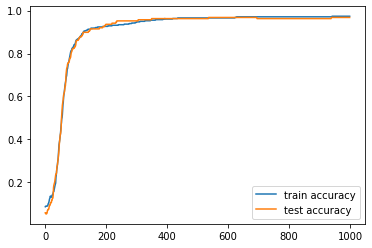

In [76]:
plt.plot(train_access, label='train accuracy')
plt.plot(test_access, label='test accuracy')
plt.legend()
plt.show()